Raw data extraction to Pandas dataframes.

In [82]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
data_path = "20150323-20190817-google-metrics-export - 20150323-20190817-google-metrics-export.csv"
data = pd.read_csv(data_path)

Number of Metric names in total from Year 2015 to Year 2019

In [85]:
group_names = data.metric_name.unique()
len(group_names)

649

In [86]:
data.time.dtype

dtype('O')

In [87]:
data.time.loc[0]

'2015-03-23T00:00:00.000-0400'

In [88]:
from datetime import datetime
datetime.strptime("2015-03-23T00:00:00.000-0400", "%Y-%m-%dT%H:%M:%S.%f%z")

datetime.datetime(2015, 3, 23, 0, 0, tzinfo=datetime.timezone(datetime.timedelta(days=-1, seconds=72000)))

converting all the dates of time column by using the `apply` method.

In [89]:
data.time = data.time.apply(lambda d: datetime.strptime(d, "%Y-%m-%dT%H:%M:%S.%f%z"))   

In [91]:
time = data.time
time.head()

0    2015-03-23 00:00:00-04:00
1    2015-03-23 00:00:00-04:00
2    2015-03-23 00:00:00-04:00
3    2015-03-23 00:00:00-04:00
4    2015-03-23 00:00:00-04:00
Name: time, dtype: object

Metric Names and the number of metric values associated with the corresponding metric name. Number of times a metric name appeared in the data set

In [93]:
counts = data['metric_name'].value_counts()
counts.head(100)

google.docs:num_1day_active_users                                 1585
google.docs:num_7day_active_users                                 1584
google.gmail:num_outbound_delivered_emails                        1584
google.gmail:num_inbound_encrypted_emails                         1584
google.gmail:num_inbound_delivered_emails                         1584
google.gmail:num_outbound_rerouted_emails                         1584
google.docs:num_30day_active_users                                1584
google.gmail:num_inbound_unencrypted_emails                       1584
google.gmail:num_inbound_spam_emails                              1584
google.gmail:num_inbound_non_spam_emails                          1584
google.gmail:num_inbound_rerouted_emails                          1584
google.gmail:num_inbound_rejected_emails                          1584
google.gmail:num_outbound_unencrypted_emails                      1584
google.gmail:num_outbound_rejected_emails                         1584
google

In [94]:
data.time = data['time'].apply(lambda x: pd.to_datetime(x).tz_convert('US/Eastern'))

Extracting year from time stamp

In [95]:
data['year'] = pd.DatetimeIndex(data['time']).year

In [96]:
data.head()

,time,metric_name,metric_value,year
0,2015-03-23 00:00:00-04:00,google.device_management:num_7day_android_4_1_...,0,2015
1,2015-03-23 00:00:00-04:00,google.device_management:num_7day_android_4_1_...,0,2015
2,2015-03-23 00:00:00-04:00,google.device_management:num_7day_android_4_2_...,0,2015
3,2015-03-23 00:00:00-04:00,google.device_management:num_7day_android_4_2_...,0,2015
4,2015-03-23 00:00:00-04:00,google.device_management:num_7day_android_4_3_...,0,2015


In [97]:
data.groupby(['metric_name', 'year']).count()

time  metric_value
metric_name                                      year                    
google._empty_                                   2017   103           103
                                                 2018   346           346
                                                 2019   144           144
google.accounts:apps_total_licenses              2015   283           283
                                                 2016   361           361
                                                 2017   346           346
                                                 2018   171           171
google.accounts:apps_used_licenses               2015   283           283
                                                 2016   361           361
                                                 2017   346           346
                                                 2018   171           171
google.accounts:authorized_apps                  2015   282           282
                                                 2016   357           357
                                                 2017   349           349
                                                 2018   334           334
                                                 2019   220           220
google.accounts:coordinate_total_licenses        2015   283           283
                                                 2016   361           361
                                                 2017   346           346
                                                 2018   171           171
google.accounts:drive_used_quota_in_mb           2015   284           284
                                                 2016   362           362
                                                 2017   358           358
                                                 2018   343           343
                                                 2019   230           230
google.accounts:gmail_used_quota_in_mb           2015   284           284
                                                 2016   362           362
                                                 2017   358           358
                                                 2018   343           343
                                                 2019   230           230
...                                                     ...           ...
google.meet:total_call_minutes_by_internal_users 2018   328           328
                                                 2019   213           213
google.meet:total_call_minutes_by_pstn_in_users  2018   328           328
                                                 2019   213           213
google.meet:total_call_minutes_by_pstn_out_users 2018   225           225
                                                 2019   213           213
google.meet:total_call_minutes_chromebase        2018   328           328
                                                 2019   213           213
google.meet:total_call_minutes_chromebox         2018   328           328
                                                 2019   213           213
google.meet:total_call_minutes_ios               2018   328           328
                                                 2019   213           213
google.meet:total_call_minutes_jamboard          2018   328           328
                                                 2019   213           213
google.meet:total_call_minutes_unknown_client    2018   328           328
                                                 2019   213           213
google.meet:total_call_minutes_web               2018   328           328
                                                 2019   213           213
google.meet:total_meeting_minutes                2018   328           328
                                                 2019   213           213
google.sites:num_sites                           2015   284           284
                                                 2016   363

Number of Metric Names based on year

In [98]:
data.query('year == "2015"')['metric_name'].agg(['nunique','size'])

nunique      273
size       69729
Name: metric_name, dtype: int64

In [99]:
data.query('year == "2016"')['metric_name'].agg(['nunique','size'])

nunique      343
size       96867
Name: metric_name, dtype: int64

In [100]:
data.query('year == "2017"')['metric_name'].agg(['nunique','size'])

nunique       497
size       145606
Name: metric_name, dtype: int64

In [101]:
data.query('year == "2018"')['metric_name'].agg(['nunique','size'])

nunique       593
size       179275
Name: metric_name, dtype: int64

In [102]:
data.query('year == "2019"')['metric_name'].agg(['nunique','size'])

nunique       590
size       120436
Name: metric_name, dtype: int64

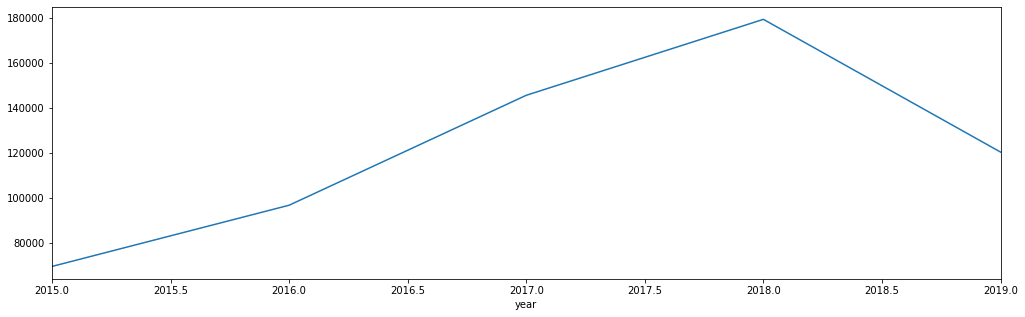

In [104]:
import matplotlib as plt
fig, ax = plt.pyplot.subplots(figsize=(17,5))
data.groupby(['year']).count()['metric_name'].plot(ax=ax)

using stack method to rotate the data frame to represent columns in rows

In [118]:
stacked = data.stack()
stacked.head(10)

0  time                                    2015-03-23 00:00:00-04:00
   metric_name     google.device_management:num_7day_android_4_1_...
   metric_value                                                    0
   year                                                         2015
1  time                                    2015-03-23 00:00:00-04:00
   metric_name     google.device_management:num_7day_android_4_1_...
   metric_value                                                    0
   year                                                         2015
2  time                                    2015-03-23 00:00:00-04:00
   metric_name     google.device_management:num_7day_android_4_2_...
dtype: object

To represent back in normal format

In [119]:
stacked.unstack().head()

,time,metric_name,metric_value,year
0,2015-03-23 00:00:00-04:00,google.device_management:num_7day_android_4_1_...,0,2015
1,2015-03-23 00:00:00-04:00,google.device_management:num_7day_android_4_1_...,0,2015
2,2015-03-23 00:00:00-04:00,google.device_management:num_7day_android_4_2_...,0,2015
3,2015-03-23 00:00:00-04:00,google.device_management:num_7day_android_4_2_...,0,2015
4,2015-03-23 00:00:00-04:00,google.device_management:num_7day_android_4_3_...,0,2015


Number of observations for each year

In [130]:
data.year.value_counts()

2018    179275
2017    145606
2019    120436
2016     96867
2015     69729
Name: year, dtype: int64

Finding the metric value by passing quantile value. In the lowest quantile values are negative. 

In [134]:
data['metric_value'].quantile(0)

-376732.0

Median of metric values

In [135]:
data['metric_value'].quantile(0.5)

0.0

Highest values are around 274032962. 

In [140]:
data['metric_value'].quantile(1.0)

274032962.0

Mean value is far away from median as our data is not homogeneous. Some metric names include values in mb which is very high in number compared to number of users metric.

In [147]:
data.metric_value.mean()

1027552.0052425753